 # MTH8408 : Méthodes d'optimisation et contrôle optimal
 ## Laboratoire 6: Optimisation avec contraintes et contrôle optimal
Tangi Migot, Dominique Orban et Paul Raynaud

Dans ce lab, on va utiliser le module [OptimalControl.jl](https://github.com/control-toolbox/OptimalControl.jl) afin de modéliser les problèmes de contrôle optimal.
L'installation de ce module nécessite la commande suivante:

In [1]:
using Pkg
Pkg.Registry.add(RegistrySpec(url = "https://github.com/control-toolbox/ct-registry.git"))

L'installation des modules peut-être assez longue, profitez-en pour lire la [documentation de OptimalControl.jl](https://control-toolbox.org/OptimalControl.jl/stable/index.html).

De plus, nous allons utiliser une version en cours de développement de CTDirect, qui est une dépendance de OptimalControl.jl.
Cette version contient une fonctionnalité permettant la création d'un ADNLPModel à partir du problème de contrôle discretisé.
Pour installer la version développée dans la branche `export` du module CTDirect.jl, il faut utiliser l'instruction suivante :

In [41]:
Pkg.add(url="https://github.com/control-toolbox/CTDirect.jl.git", rev="export")

    Updating git-repo `https://github.com/control-toolbox/CTDirect.jl.git`
   Resolving package versions...
  No Changes to `C:\Users\jgpal\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jgpal\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? CTBase
  ? CTDirect
  ? CTFlows
  ? CTProblems
  ? OptimalControl


In [5]:
import Pkg
Pkg.add(["OptimalControl", "ADNLPModels", "NLPModels", "Percival", "Plots", "JSOSolvers", "NLPModelsModifiers"]) # les autres modules nécessaires au laboratoire

   Resolving package versions...
  No Changes to `C:\Users\jgpal\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jgpal\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? CTBase
  ? CTDirect
  ? CTFlows
  ? CTProblems
  ? OptimalControl


In [42]:
Pkg.status()

Status `C:\Users\jgpal\.julia\environments\v1.10\Project.toml`
  [54578032] ADNLPModels v0.7.0
  [790bbbee] CTDirect v0.4.5 `https://github.com/control-toolbox/CTDirect.jl.git#export`
  [7073ff75] IJulia v1.24.2
⌃ [b6b21f68] Ipopt v1.6.0
  [10dff2fc] JSOSolvers v0.11.1
⌃ [4076af6c] JuMP v1.18.1
⌃ [5c8ed15e] LinearOperators v2.6.0
⌃ [b8f27783] MathOptInterface v1.25.0
  [a4795742] NLPModels v0.20.0
⌃ [e01155f1] NLPModelsModifiers v0.6.6
  [5f98b655] OptimalControl v0.7.6
  [01435c0c] Percival v0.7.1
  [91a5bcdd] Plots v1.40.2
  [37e2e46d] LinearAlgebra
Info Packages marked with ⌃ have new versions available and may be upgradable.


Si jamais votre installation de `OptimalControl` échoue, mettez à jour julia:
```julia
using UpdateJulia # à ajouter au préalable
update_julia() # puis on redémarre VS Code
```

## Exercice 1: Commande optimale

Dans cet exercice, on considère le problème de gestion de portefeuille vu en cours:
$$
\max_{x,u} \int_0^T (1-u(t))x(t) dt, \quad x(0)=x_0, \dot{x}(t) = \gamma u(t) x(t), \quad 0 \leq u(t) \leq 1
$$
modélisé à l'aide de `OptimalControl.jl`.
Compléter les `...` en vous inspirant du [tutoriel de OptimalControl.jl](https://control-toolbox.org/OptimalControl.jl/stable/tutorial-goddard.html).
On suppose `n = 100`, `T = 1`, `γ = 3` et `x0 = 0.1`.

In [1]:
using OptimalControl, Plots, JSOSolvers, NLPModels, ADNLPModels, Percival, Percival, NLPModelsModifiers, CTDirect

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Warning: Module CTBase with build ID ffffffff-ffff-ffff-0001-a75f6c525fea is missing from the cache.
│ This may mean CTBase [54762871-cc72-4466-b8e8-f6c8b58076cd] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1942
┌ Warning: Module CTBase with build ID ffffffff-ffff-ffff-0001-a75f6c525fea is missing from the cache.
│ This may mean CTBase [54762871-cc72-4466-b8e8-f6c8b58076cd] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1942
┌ Warning: Module CTBase with build ID ffffffff-ffff-ffff-0001-a75f6c525fea is missing from the cache.
│ This may mean CTBase [54762871-cc72-4466-b8e8-f6c8b58076cd] does not support precompilation but is imported by 

In [15]:
import Pkg
Pkg.add("NLPModelsIpopt")

   Resolving package versions...
    Updating `C:\Users\jgpal\.julia\environments\v1.10\Project.toml`
  [f4238b75] + NLPModelsIpopt v0.10.1
  No Changes to `C:\Users\jgpal\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? CTBase
  ? CTDirect
  ? CTFlows
  ? CTProblems
  ? OptimalControl


In [2]:
T = 1
γ = 3
x0 = 0.1

@def ocp begin
  t ∈ [ 0, T ], time
  x ∈ R, state
  u ∈ R, control
  0 ≤ u(t) ≤ 1
  
  x(0) == x0
  ẋ(t) == γ * u(t)*x(t) # 

  ∫((1-u(t))x(t)) → max
end



t ∈ [0, T], time
x ∈ R, state
u ∈ R, control
0 ≤ u(t) ≤ 1
x(0) == x0
ẋ(t) == γ * u(t) * x(t)
∫((1 - u(t)) * x(t)) → max



┌───────┬───────┬─────────┬──────────┬───────────┬─────────────┐
│ times │ state │ control │ dynamics │ objective │ constraints │
├───────┼───────┼─────────┼──────────┼───────────┼─────────────┤
│    ✅ │    ✅ │      ✅ │       ✅ │        ✅ │          ✅ │
└───────┴───────┴─────────┴──────────┴───────────┴─────────────┘


### Question 1: Résoudre et affichage
Lire la documentation de OptimalControl.jl et résoudre le problème discretisé `docp`.

In [5]:
n = 100
docp = DirectTranscription(ocp, grid_size=n)
#sol = solve(ocp, grid_size=100)

CTDirect.DOCP(CTBase.OptimalControlModel{Autonomous, Fixed}
  model_expression: Expr
  initial_time: Int64 0
  initial_time_name: String "0"
  final_time: Int64 1
  final_time_name: String "1"
  time_name: String "t"
  control_dimension: Int64 1
  control_components_names: Array{String}((1,))
  control_name: String "u"
  state_dimension: Int64 1
  state_components_names: Array{String}((1,))
  state_name: String "x"
  variable_dimension: Nothing nothing
  variable_components_names: Nothing nothing
  variable_name: Nothing nothing
  lagrange: CTBase.Lagrange{Autonomous, Fixed}
  mayer: Nothing nothing
  criterion: Symbol max
  dynamics: CTBase.Dynamics{Autonomous, Fixed}
  constraints: Dict{Symbol, Tuple}
, 0, false, false, false, true, false, false, false, false, true, false, true, false, false, 0, 0, 0, 0, 1, 0, 1, 0, 0, (Real[], CTBase.var"#ξ#100"(Core.Box(ControlConstraint[])), Real[]), (Real[], CTBase.var"#η#101"(Core.Box(StateConstraint[])), Real[]), (Real[], CTBase.var"#ψ#102"(Cor

In [18]:
using NLPModelsIpopt

In [19]:
sol = ipopt(docp) # résout le problème via Ipopt

MethodError: MethodError: no method matching ipopt(::CTDirect.DOCP)

Closest candidates are:
  ipopt(!Matched::AbstractNLPModel; kwargs...)
   @ NLPModelsIpopt C:\Users\jgpal\.julia\packages\NLPModelsIpopt\WBABa\src\NLPModelsIpopt.jl:155


À partir de la documentation, affichez `u` et `x` (en autres).

In [20]:
fig = plot(sol, size = (800,800))

UndefVarError: UndefVarError: `sol` not defined

La figure peut-être enregistrée avec la fonction:

In [38]:
using Plots
savefig(fig, "exercice1.pdf")

"c:\\Users\\jgpal\\OneDrive\\Documents\\GitHub\\MTH8408-Hiv24\\lab6\\exercice1.pdf"

Donner une interprétation des résultats obtenus.

### Conversion en un ADNLPModel

On peut obtenir un ADNLPModel à partir de `docp`.

In [21]:
nlp = getNLP(docp) # récupère le problème discretisé sous forme d'un ADNLPModel

ADNLPModel - Model with automatic differentiation backend ADModelBackend{
  ReverseDiffADGradient,
  ReverseDiffADHvprod,
  ForwardDiffADJprod,
  ReverseDiffADJtprod,
  SparseADJacobian,
  SparseReverseADHessian,
  ForwardDiffADGHjvprod,
}
  Problem name: Generic
   All variables: ████████████████████ 303    All constraints: ████████████████████ 202   
            free: ██████████████⋅⋅⋅⋅⋅⋅ 202               free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ███████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 101            low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ████████████████████ 202   
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: ( 99.78% sparsity)   101             linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
        

Pour minimiser le `nlp` modèle (contraint) extrait, on peut utiliser le solver de [Percival.jl](https://github.com/JuliaSmoothOptimizers/Percival.jl). 

In [26]:
ges = percival(nlp, verbose = 1) # modifier verbose=1 pour obtenir un affichage des itérations
#@test :first_order == ges.status

"Execution stats: first-order stationary"

In [27]:
ges.status

:first_order

Pour afficher `x` et `u`, il est cependant plus simple de réutiliser les fonctionnalités de CTDirect.jl:

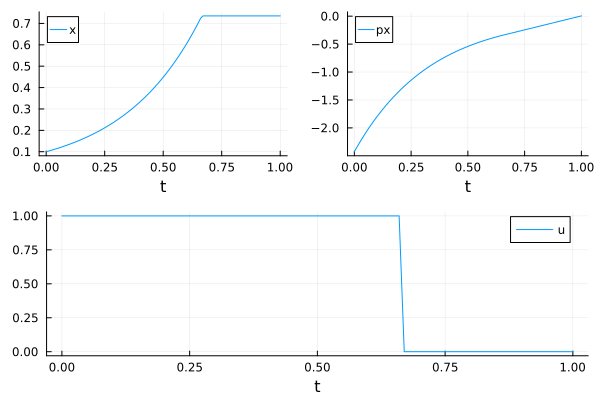

In [23]:
sol = CTDirect._OptimalControlSolution(ges, docp)
fig = plot(sol)

Ce n'est pas une erreur de votre implémentation si les états adjoints `p` sont inversés.

### Question 2: Bang-bang
A quelle instant `t` se situe le changement de trajectoire?

Modifier `γ` afin d'obtenir un contrôle non bang-bang, i.e. `ẋ` n'est pas linéaire en `u`.

---
---

On remarque que le contrôle change à 0.6 secondes, en même temps que le changement de trajectoire.

On pourrait modifier $\gamma$ pour que $\gamma(t) = u(t)$

In [ ]:
T = 1
x0 = 0.1

@def ocp begin
  t ∈ [ 0, T ], time
  x ∈ R, state
  u ∈ R, control
  #γ ∈ R, state
  0 ≤ u(t) ≤ 1
  #γ(t) ==(1+ u(t))
  x(0) == x0
  ẋ(t) == (1+ u(t))*u(t)*x(t) # 

  ∫((1-u(t))x(t)) → max
end

n = 100
sol = CTDirect.solve(ocp, grid_size=n) 

### Question 3: Un contrôle non bang-bang
Proposer une modification continue de ẋ de manière à déterminer un contrôle qui n'est plus bang-bang.
Afficher les graphiques obtenus.
`T, x0` et `n` sont identiques à précédemment.

In [11]:
T = 1
x0 = 0.1

@def ocp begin
  t ∈ [ 0, T ], time
  x ∈ R, state
  u ∈ R, control
  #γ ∈ R, state
  0 ≤ u(t) ≤ 1
  #γ(t) ==(1+ u(t))
  x(0) == x0
  ẋ(t) == (1+ u(t))*u(t)*x(t) # 

  ∫((1-u(t))x(t)) → max
end

n = 100
sol = CTDirect.solve(ocp, grid_size=n) 

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:     1002
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      202

Total number of variables............................:      303
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      101
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 9.89e-04   0.0 0.00e+00    -  0.00e+00 0.00e+00 

CTBase.OptimalControlSolution

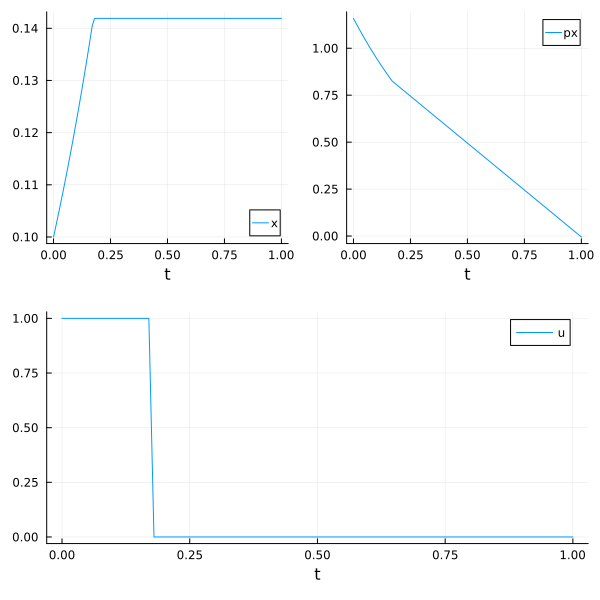

In [12]:
#sol = ...(docp) # résout le problème via Ipopt
plot(sol, size=(600,600))

## Exercice 2: Le réservoir

Dans ce dernier exercice, on considère le problème de réservoir (exercice 5 control.pdf):.

$$
\max_{x_1,x_2,u} x_2(T), \quad \dot{x_1} = -x_1 + u, \dot{x_2} = x_1, x_1(0) = x_2(0) = 0, x_1(1)=γ, x_1(t)\leq γ
$$
Compléter le code suivant en considérant $n=10$ et $γ = 0.5$.

In [32]:
T = 10
γ = 0.5

@def ocp begin
  t ∈ [0, T], time
  x ∈ R², state
  u ∈ R, control
  0 ≤ u(t) ≤ 1
  
  x(0) == [0, 0]
  ẋ(t) == [-x₁(t) + u(t), x₁(t)]
  x₁(T) == γ
  x₁(t) ≤ γ
  #x₂(t) ≤ 1

  x₂(T) → max
end

n = 100
sol = CTDirect.solve(ocp, grid_size=n) 

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:      803
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      303
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      101
                     variables with only upper bounds:      101
Total number of equality constraints.................:      203
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 4.00e-01 4.33e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

CTBase.OptimalControlSolution

Résoudre et afficher le problème

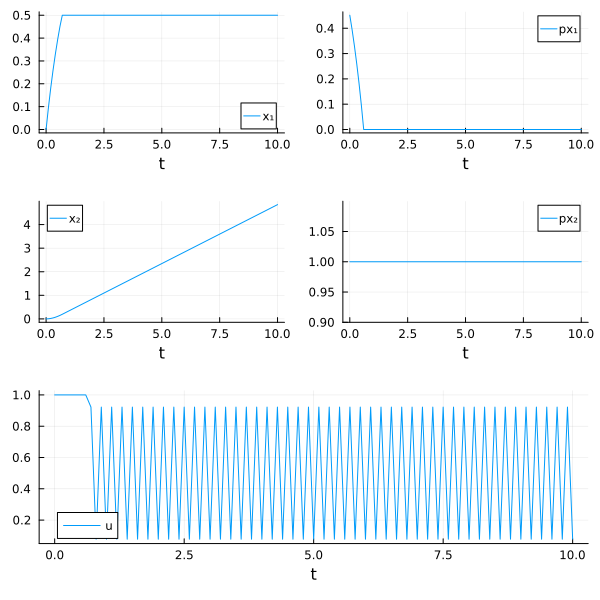

In [33]:
#sol = ...(docp) # résout le problème via Ipopt
plot(sol, size=(600,600))

In [ ]:
#nlp = getNLP(docp)
#sol = CTDirect._OptimalControlSolution(ges, docp)
#fig = plot(sol)

### Question: Convergence en n

Recommencer le processus pour observer la convergence du contrôle pour plusieurs valeurs de n (100, 500, 1000).

## Exercice 3: Git/Github, Pull request, OptimizationProblems

L'objectif de cet exercice est d'intégrer le problème que vous avez développé dans la question 3 (Un contrôle non bang-bang) au dépôt https://github.com/paraynaud/OptimizationProblems.jl en ouvrant une "Pull Request".

A tout moment, n'hésitez pas à demander de l'aide sur Zulip sur cette partie.

### Etape 1: Clone & fork (similaire aux laboratoires précédents)

Afin de faire une proposition de modification au package `paraynaud/OptimizationProblems.jl` vous allez devoir "cloner" ce package sur votre compte github et ouvrir une nouvelle branche où ajouter la modification.

- [ ] Aller sur https://github.com/paraynaud/OptimizationProblems.jl et cliquer sur "Fork" en haut à droite de l'écran.
- [ ] En suivant les indications du README du lab1 et clonez la version sur votre compte github.
- [ ] En suivant les inditions du README du lab2 et ouvrez une nouvelle branche de travail. (en général on essaye d'éviter de travailler directement sur la branche `main`).

### Etape 2: Compléter l'implémentation des problèmes

Lisez la documentation du package OptimizationProblems.jl, https://juliasmoothoptimizers.github.io/OptimizationProblems.jl/dev/contributing/, particulièrement la section "Templates for the new functions".

Pour créer votre problème, ajouter un fichier `<votre_nom>.jl` dans le sous-répertoire `src/ADNLPProblems/`.
Dans ce fichier, vous devez ajouter la formulation de votre problème de la question 3, en conservant `n` comme un argument optionnel, mis à `10` par défaut.

Il est fort probable qu'en plus de votre fichier `src/ADNLPProblems/<votre_nom>.jl`, vous modifiez le fichier `Project.toml` lors de l'ajout des modules OptimalControl.jl et CTDirect.jl, ce n'est pas un problème.

### Etape 3: Modifier le package et mise en ligne
- [ ] Une fois les modifications satisfaisantes faire un `git push origin nom_de_votre_branch` pour mettre en ligne vos modifications.
- [ ] Ouvrir la Pull Request vers paraynaud/OptimizationProblems.jl **et non JuliaSmoothOptimizers/OptimizationProblems.jl** !!!